# ZADANIE 1

In [125]:
from collections.abc import Callable


class ContinuousSignal:

    def __init__(self, signal: Callable[[float], float], frequency: float, periods: float = 1.0) -> None:
        self.signal = signal
        self.frequency = frequency
        self.periods = periods


class DiscreteSignal:

    def __init__(self, timepoints, values, sampling_frequency):
        assert len(timepoints) == len(values)

        self.timepoints = timepoints
        self.values = values
        self.sampling_frequency = sampling_frequency

    def __str__(self) -> str:
        return "{\n\t" + "\n\t".join([f"{x}: {y}" for x, y in zip(self.timepoints, self.values)]) + "\n}"


class FFT:

    def __init__(self, frequencies, amplitudes, arguments = None) -> None:
        assert len(frequencies) == len(amplitudes)

        self.frequencies = frequencies
        self.amplitudes = amplitudes
        self.arguments = arguments

    def __str__(self) -> str:
        return "{\n\t" + "\n\t".join([f"{x}: {y}" for x, y in zip(self.timepoints, self.values)]) + "\n}"


class Style:

    def __init__(self, linestyle = '-', color = '#0000fa') -> None:
        self.linestyle = linestyle
        self.color = color

In [126]:
from pylab import Axes

# Draws discretized signal over `base`` "continuous" signal.
def draw_signal(ax: Axes, base: DiscreteSignal, sampled: DiscreteSignal, base_style: Style = Style(), sampled_style: Style = Style('o', '#fa0000')):
    MAX = max(max(base.values), max(sampled.values))
    MIN = min(min(base.values), min(sampled.values))

    margin = (MAX - MIN) * 0.1
    ax.set_ylim(MIN - margin, MAX + margin)
    ax.set_xlabel("t [s]")
    ax.set_ylabel("y")

    ax.plot(base.timepoints, base.values, base_style.linestyle, color = base_style.color)
    ax.plot(sampled.timepoints, sampled.values, sampled_style.linestyle, color = sampled_style.color)


# Draws FFT stem plot from given Fourier Transform.
def draw_fft(ax: Axes, signal: FFT, linestyle: str = '-*'):
    MAX = max(signal.amplitudes)
    MIN = min(signal.amplitudes)

    margin = (MAX - MIN) * 0.1
    ax.set_ylim(MIN - margin, MAX + margin)
    ax.set_xlabel("f [Hz]")
    ax.set_ylabel("A")

    ax.stem(signal.frequencies, signal.amplitudes, linefmt = linestyle)

In [127]:
import numpy as np

def sample(signal: ContinuousSignal, sampling_frequency: float) -> DiscreteSignal:
    timepoints = np.arange(0, signal.periods / signal.frequency, 1.0 / sampling_frequency)
    values = signal.signal(timepoints)

    return DiscreteSignal(timepoints, values, sampling_frequency)

def fft(signal: DiscreteSignal) -> FFT:
    divider = float(len(signal.values)) / 2.0
    arguments = np.fft.fft(signal.values)
    fourier = np.abs(arguments) / divider
    fourier[0] /= 2.0

    # If amplitude is less than 10^-6 then it's most probably numeric error.
    fourier[fourier < 0.000001] = 0

    sample_count = len(signal.values)
    frequencies = [i * signal.sampling_frequency / sample_count for i in range(len(signal.values))]

    return FFT(frequencies, fourier, arguments)

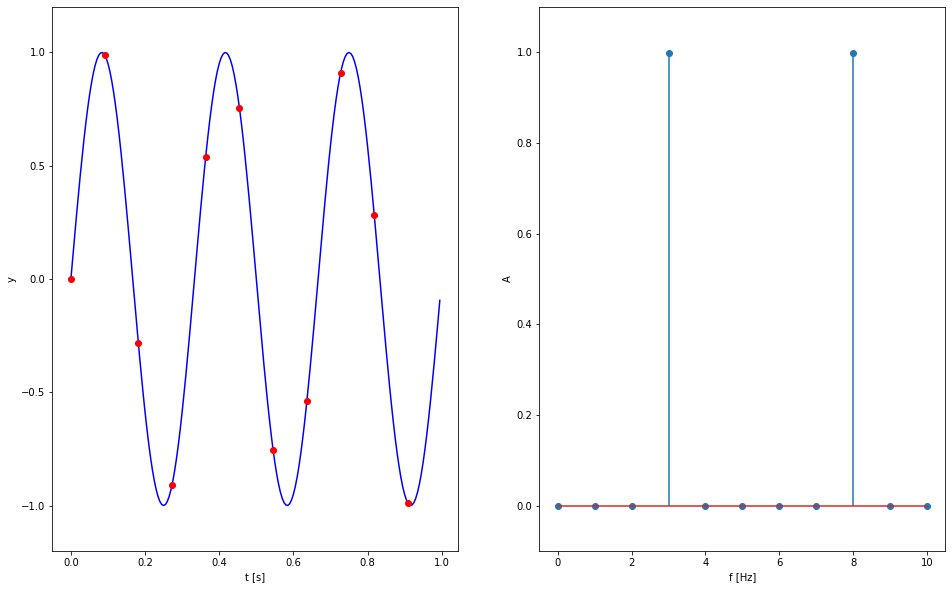

In [128]:
from pylab import figure

signal = ContinuousSignal(lambda x: np.sin(2 * np.pi * 3 * x), 1.0, 1.0)

base = sample(signal, 200.0)
sampled = sample(signal, 11)

fig = figure(1, figsize = (16, 10))
ax = fig.add_subplot(121)

fourier = fft(sampled)

draw_signal(ax, base, sampled)

ax = fig.add_subplot(122)
draw_fft(ax, fourier, '-*')

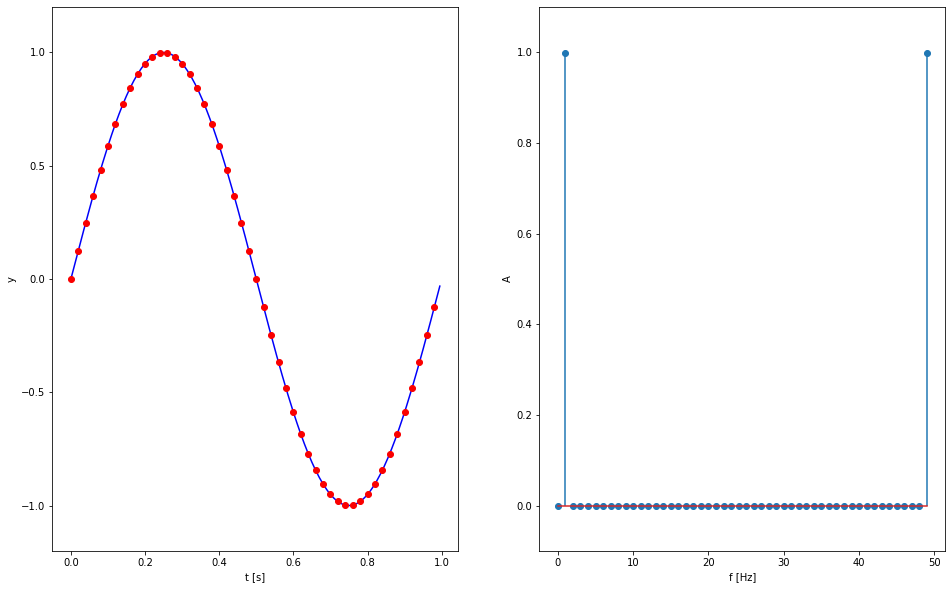

In [129]:
AMPLITUDE = 1.0
SIGNAL_FREQUENCY = 1.0

signal = ContinuousSignal(lambda x: AMPLITUDE * np.sin(2 * np.pi * x * SIGNAL_FREQUENCY), SIGNAL_FREQUENCY, 1)

base = sample(signal, 200.0)
sampled = sample(signal, 50.0)

fourier = fft(sampled)

fig = figure(1, figsize = (16, 10))

ax = fig.add_subplot(121)
draw_signal(ax, base, sampled)

ax = fig.add_subplot(122)
draw_fft(ax, fourier, '-*')


# ZADANIE 2

a)

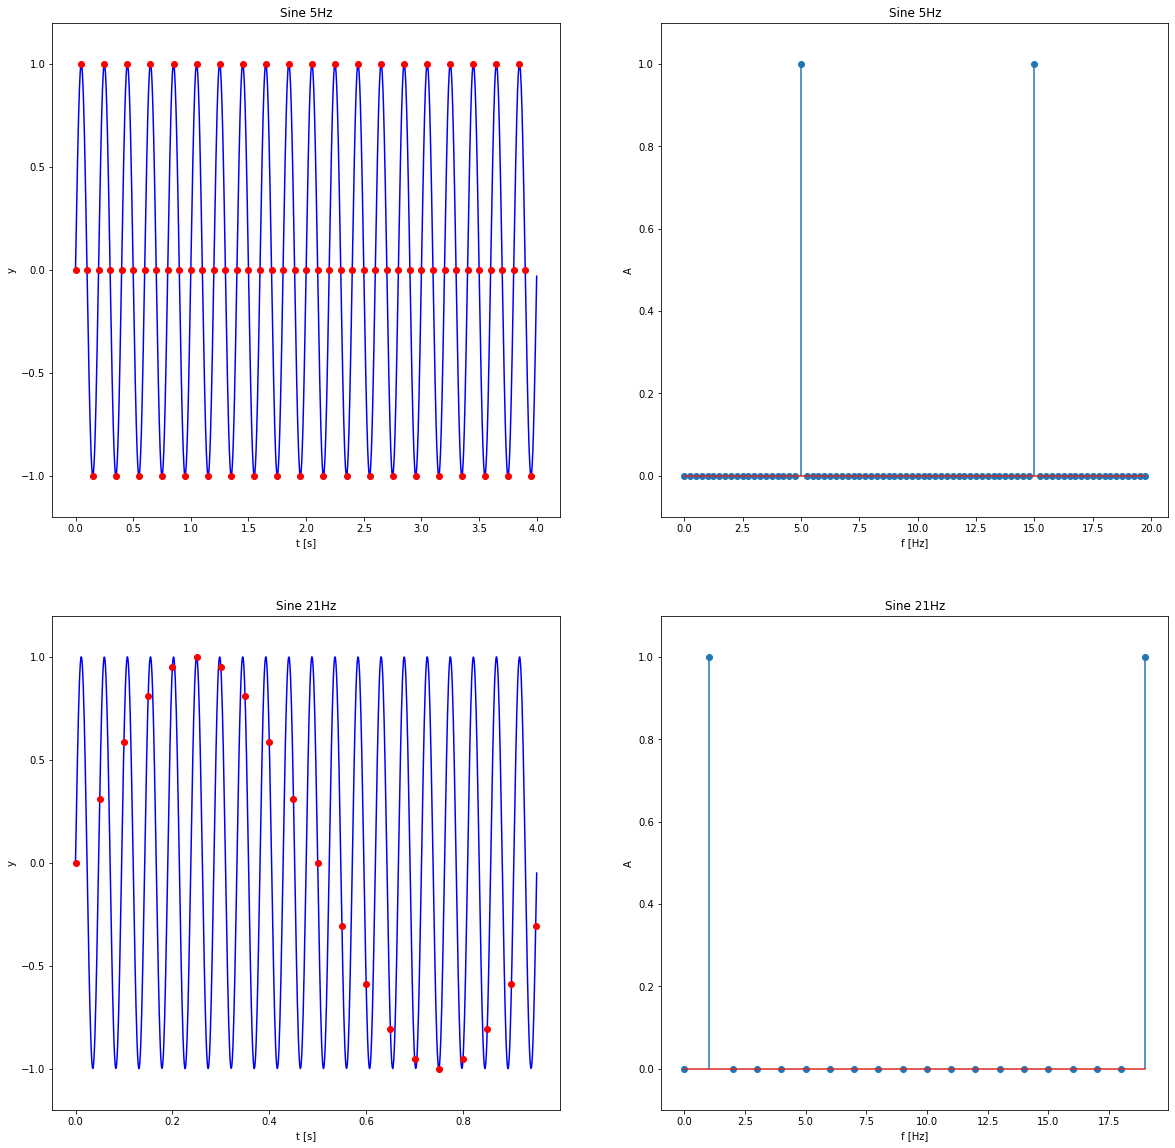

In [130]:
signal_5_hz = ContinuousSignal(lambda t: np.sin(2 * np.pi * 5 * t), 5, 20)
signal_21_hz = ContinuousSignal(lambda t: np.sin(2 * np.pi * 21 * t), 21, 20)

sampled_5_hz = sample(signal_5_hz, 20.0)
sampled_21_hz = sample(signal_21_hz, 20.0)

fourier_5_hz = fft(sampled_5_hz)
fourier_21_hz = fft(sampled_21_hz)

fig = figure(1, figsize = (20, 20))

ax_0 = fig.add_subplot(221)
ax_1 = fig.add_subplot(222)
ax_2 = fig.add_subplot(223)
ax_3 = fig.add_subplot(224)

ax_0.set_title("Sine 5Hz")
ax_1.set_title("Sine 5Hz")
ax_2.set_title("Sine 21Hz")
ax_3.set_title("Sine 21Hz")

base_5_hz = sample(signal_5_hz, 1000.0)
base_21_hz = sample(signal_21_hz, 1000.0)

draw_signal(ax_0, base_5_hz, sampled_5_hz)
draw_fft(ax_1, fourier_5_hz)
draw_signal(ax_2, base_21_hz, sampled_21_hz)
draw_fft(ax_3, fourier_21_hz)

W przypadku sygnału 21Hz przy próbkowaniu 20Hz nastąpiło zjawisko aliasingu. Zgodnie z teorią informacji częstotliwości aliasingowe można opisać wzorem $f_{a} = f_{0} + kf_{sam}$  $k \in \mathbb{Z}$, co oznacza, że dla próbkowania 20Hz częstotliwość 21Hz można rozpisać jako $1Hz + 1 * 20Hz$, a więc 21Hz jest częstotliwością aliasingową dla 1Hz przy próbkowaniu 20Hz. Aby uniknąć aliasingu należałoby zwiększyć częstotliwość próbkowania przynajmniej do 42Hz.

b)

In [131]:
def signal(frequency):
    return lambda t: np.sin(2 * np.pi * t * frequency)

i) $sin(2*pi*t*f)$, $f=10Hz$

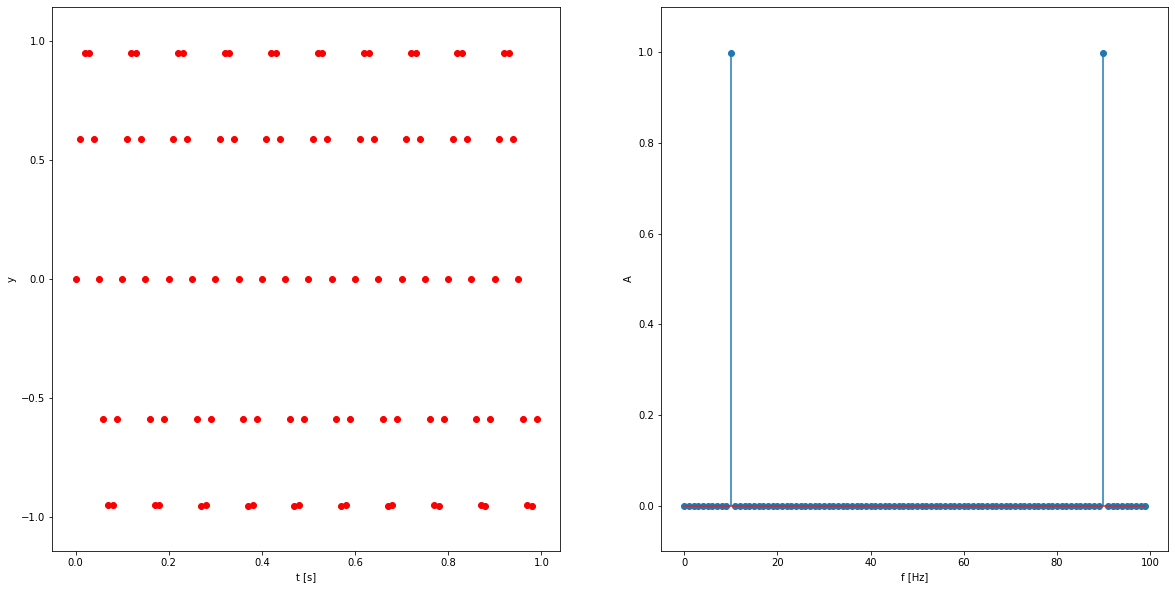

In [132]:
sampled = sample(ContinuousSignal(signal(10), 10, 10), 100.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

base = DiscreteSignal([0], [0], 1000.0)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

ii) $sin(2*pi*t*f)$, $f=20Hz$

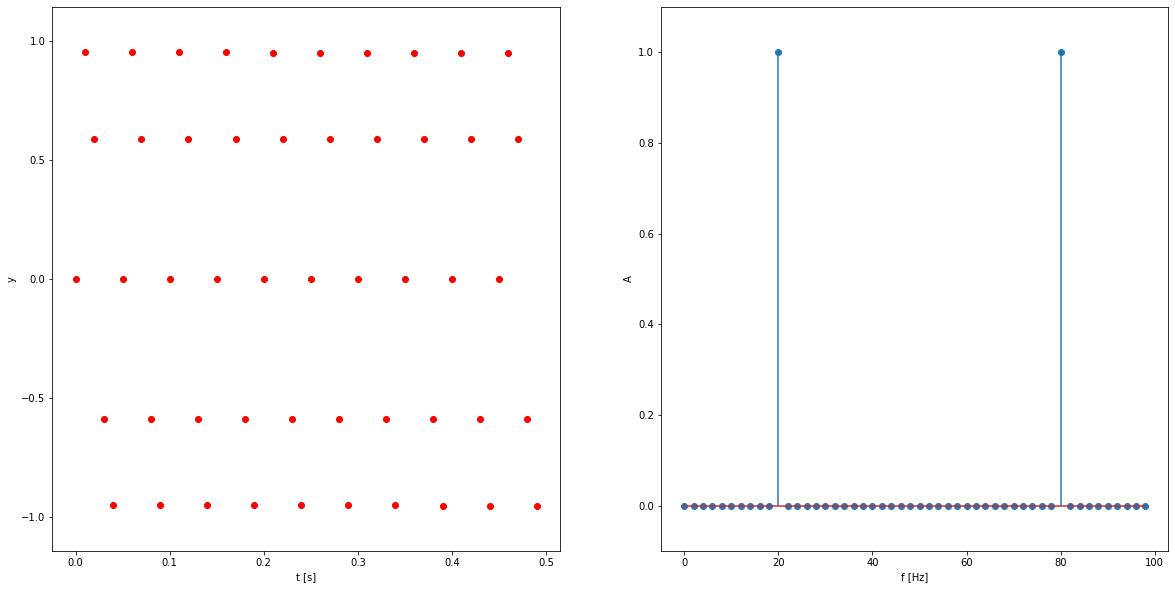

In [133]:
sampled = sample(ContinuousSignal(signal(20), 20, 10), 100.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

base = DiscreteSignal([0], [0], 1000.0)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

iii) $sin(2*pi*t*f)$, $f=30Hz$

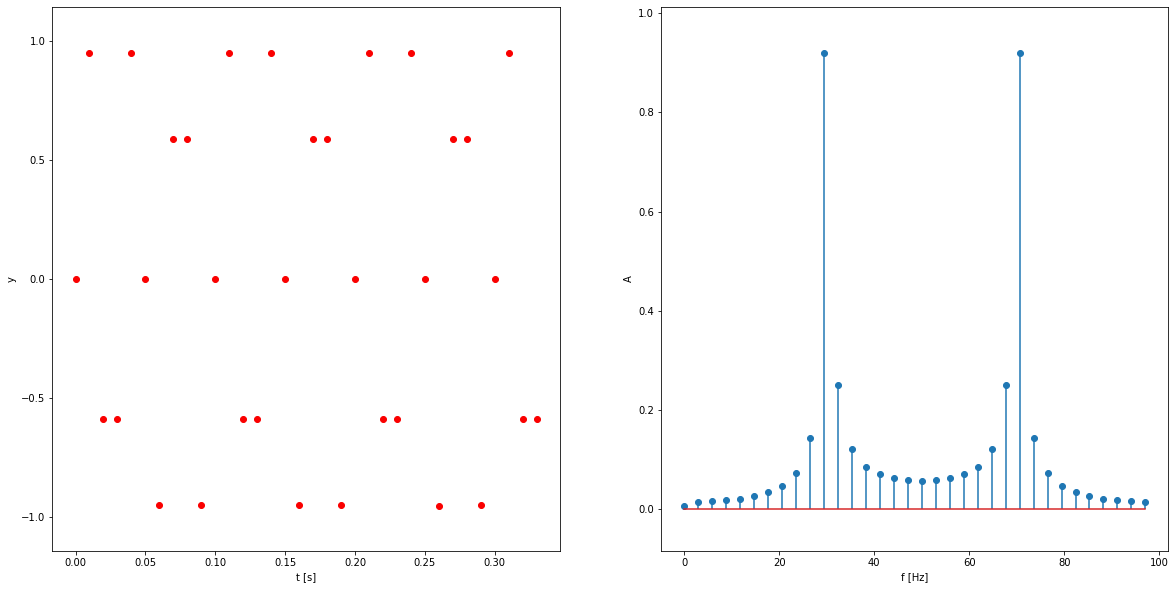

In [134]:
sampled = sample(ContinuousSignal(signal(30), 30, 10), 100.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

base = DiscreteSignal([0], [0], 1000.0)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

iv) $sin(2*pi*t*f)$, $f=40Hz$

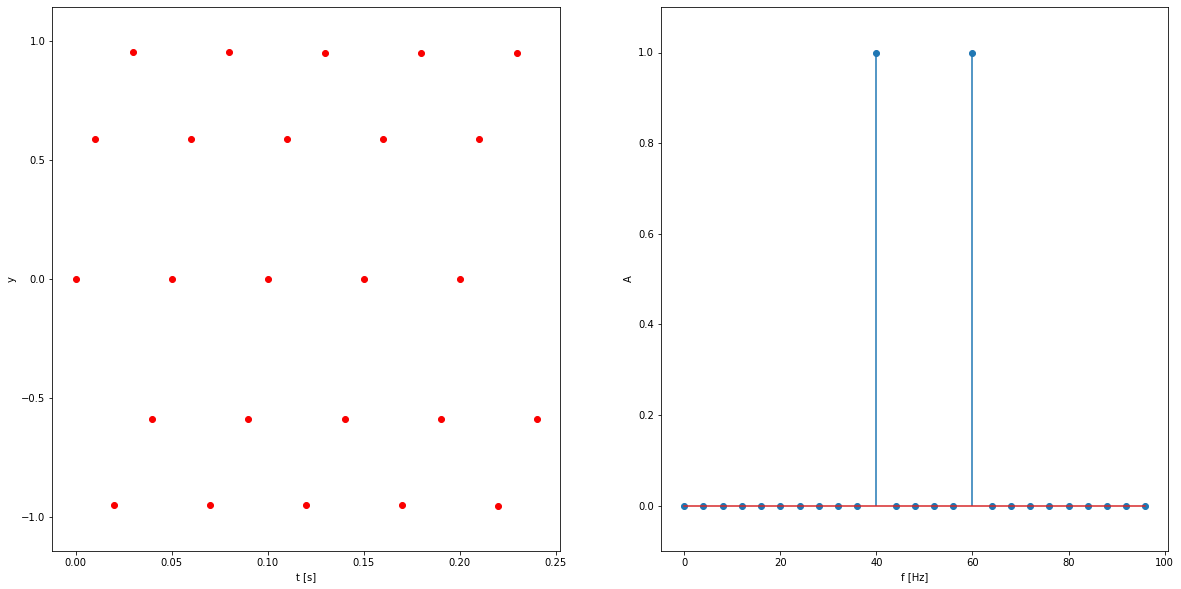

In [135]:
sampled = sample(ContinuousSignal(signal(40), 40, 10), 100.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

base = DiscreteSignal([0], [0], 1000.0)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

v) $sin(2*pi*t*f)$, $f=50Hz$

/tmp/ipykernel_163088/2111008763.py:23: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(MIN - margin, MAX + margin)


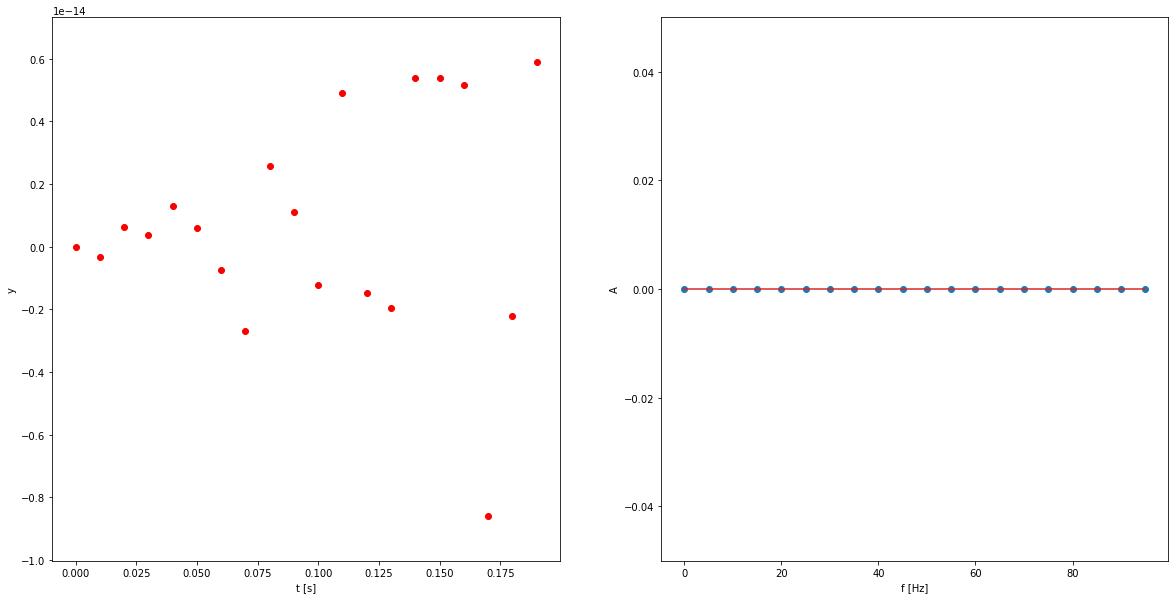

In [136]:
sampled = sample(ContinuousSignal(signal(50), 50, 10), 100.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

base = DiscreteSignal([0], [0], 1000.0)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

c) Twierdzenie, które opisuje uzyskane spektrum, to twierdzenie Nyquista - Shannona (Whittakera - Kotielnikowa - Nyquista - Shannona)

# ZADANIE 3

a) $signal = sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

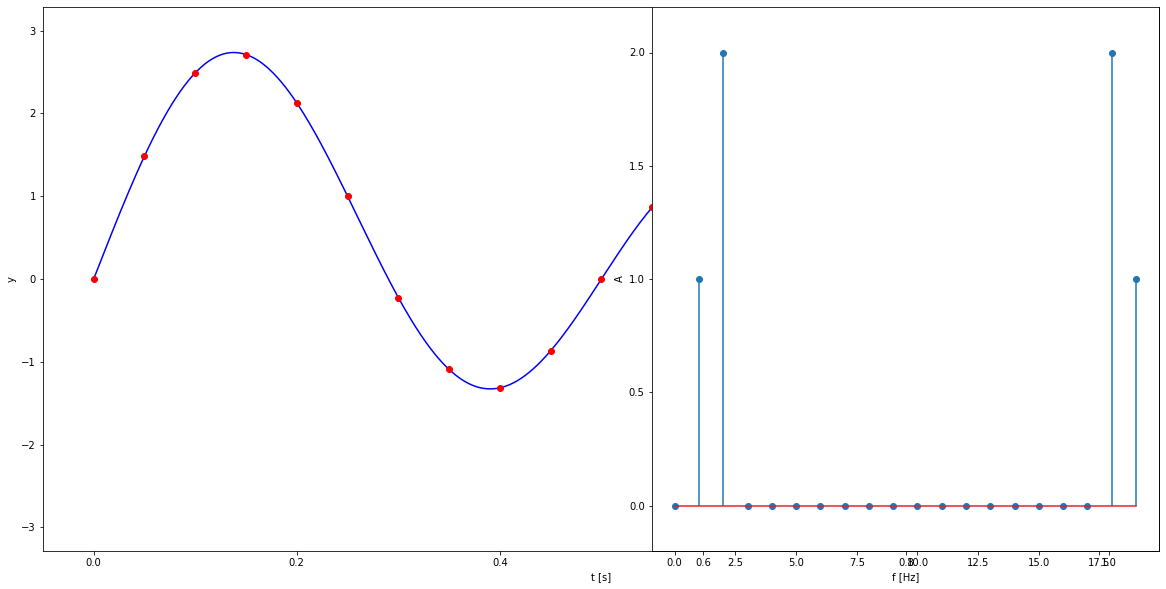

In [137]:
FREQ = 1.0

signal = ContinuousSignal(
    lambda t: np.sin(2 * np.pi * FREQ * t) + 2 * np.sin(4 * np.pi * FREQ * t),
    10.0,
    10
)

base = sample(signal, 1000.0)
sampled = sample(signal, 20.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(111)
ax_1 = fig.add_subplot(122)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

b) Wygenerujemy trochę szumu. Wychodząc z funkcji $sin(2*pi*t*f)$, dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.02, 0.08], częstotliwosci: [5.0, 10.0] oraz modyfikacje fazy[0 + 2*pi]. Inne parametry: $f_{sam} = 20Hz$, $T = 1s \implies f_{sig} = 1Hz$. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg ($sin(2*pi*t)$)? Czy jesteś w stanie zlokalizować szum?

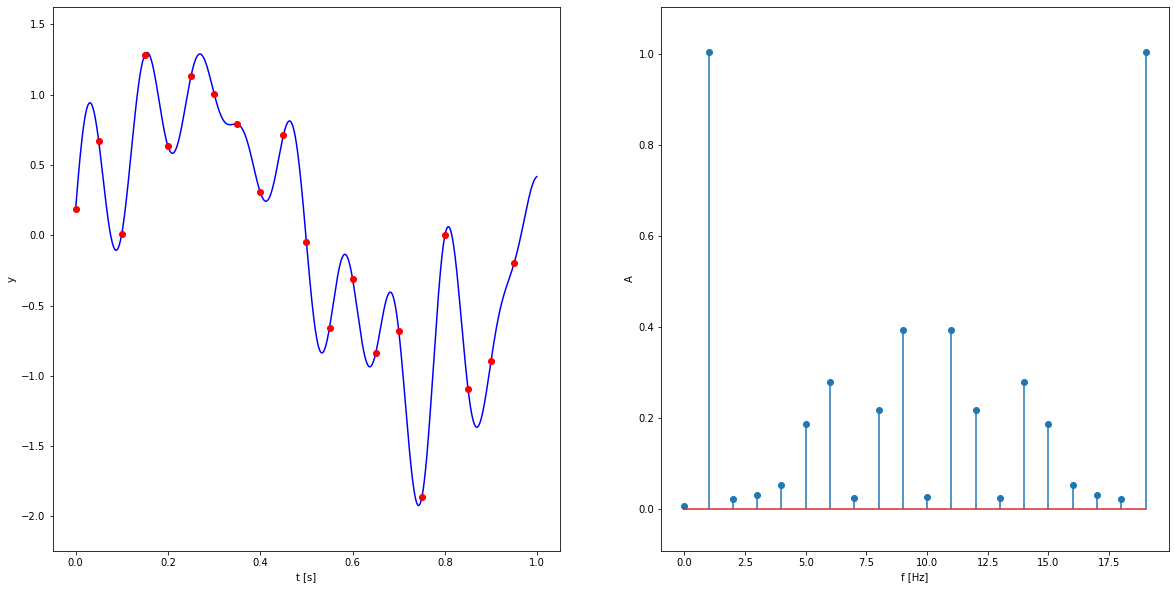

In [138]:
FREQ = 1.0
signal = f"lambda t: np.sin(2 * np.pi * t * {FREQ})"

for _ in range(100):
    amplitude = np.random.uniform(0.02, 0.08)
    freq = np.random.uniform(5.0, 10.0)
    phase = np.random.uniform(0.0, 2 * np.pi)
    noise = f" + {amplitude} * np.sin(2 * np.pi * {freq} * t + {phase})"
    signal += noise

signal = eval(signal)

signal = ContinuousSignal(signal, 10.0, 10.0)

base = sample(signal, 1000.0)
sampled = sample(signal, 20.00)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

Przy założeniu rozkładu jednorodnego lub normalnego o wystarczająco dużym odchyleniu standardowym można zlokalizować szum, zakładając że amplituda szumu nie przekracza 1.
Natomiast w przypadku pesymistycznym (szum składający się z sygnałów o takiej samej charakterystyce) nie da się go wyizolować.

c) $0.5 + 2*sin(2*pi*t*f)$, $T = 1s \implies f_{sig} = 1Hz$, $f_{sam} = 20Hz$. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

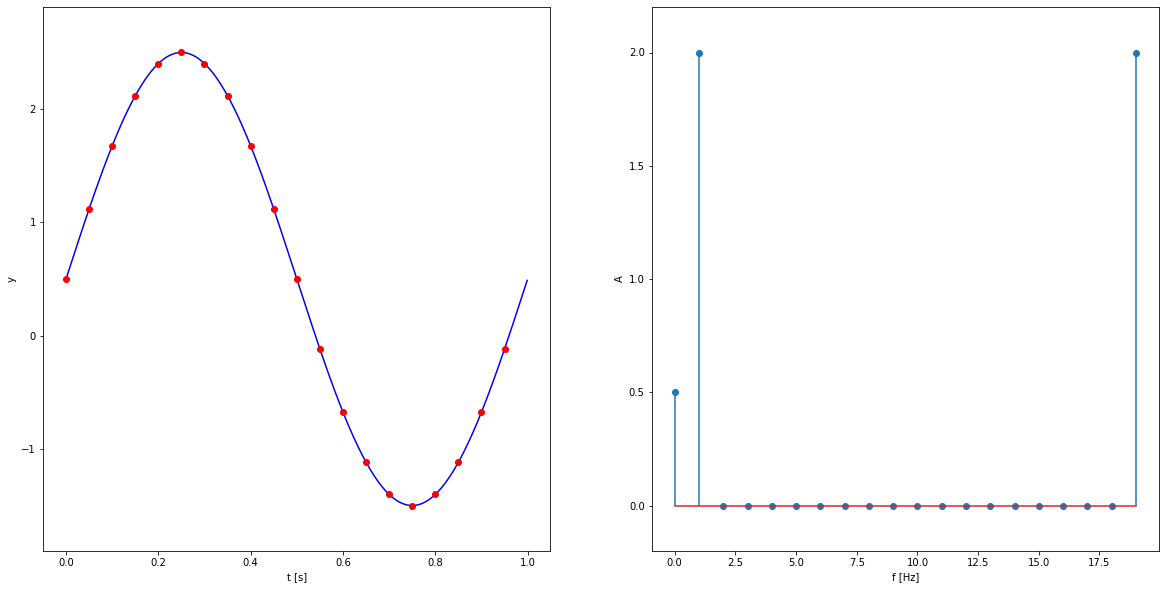

In [139]:
FREQ = 1.0
signal = ContinuousSignal(lambda t: 2 * np.sin(2 * np.pi * FREQ * t) + 0.5, 1, 1)

base = sample(signal, 1000.0)
sampled = sample(signal, 20.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

Amplituda zerowego prążka jest właściwa, ponieważ wskazuje przesunięcie na osi wartości.

d) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla $T = 1s$, $f_{sam} = 20Hz$. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

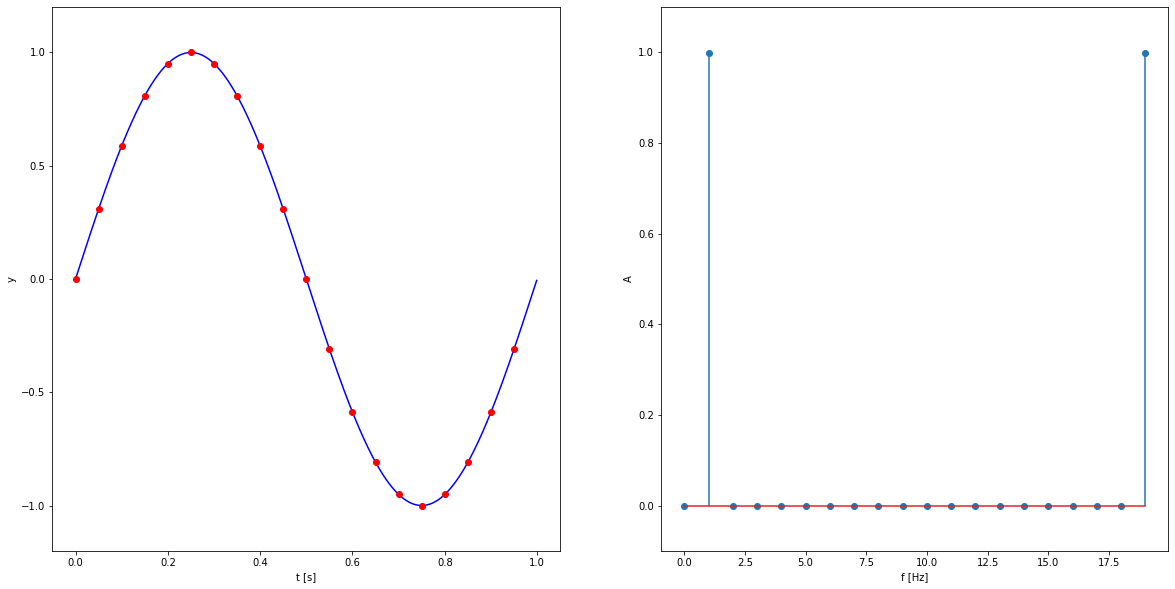

In [140]:
FREQ = 1.0
signal = ContinuousSignal(lambda t: np.sin(2 * np.pi * FREQ * t), FREQ, 1)
base = sample(signal, 1000.0)
sampled = sample(signal, 20.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

array([ 180.        ,  -45.        ,  116.78563595,  180.        ,
       -170.96212841,  -78.01728813,   -7.0538274 ,   26.56505118,
         53.15830262,  126.96148855, -180.        , -131.63353934,
        -53.15830262,   25.32446462,    7.0538274 ,   90.        ,
        170.96212841, -115.53144089, -116.78563595,   45.        ])

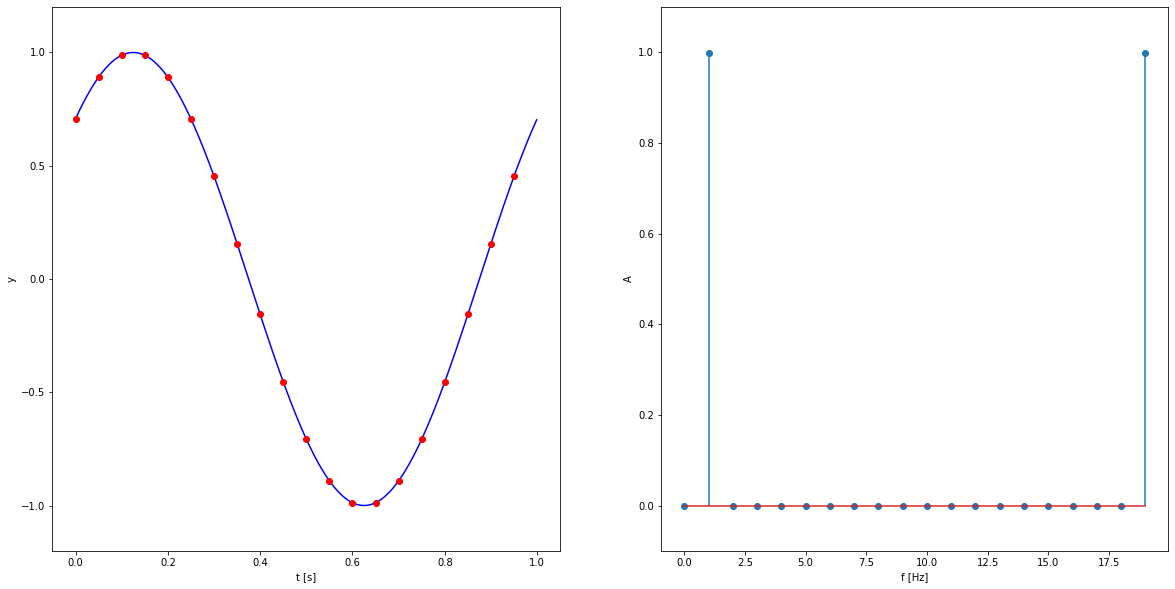

In [141]:
FREQ = 1.0
signal = ContinuousSignal(lambda t: np.sin(2 * np.pi * FREQ * t + np.pi / 4), FREQ, 1)
base = sample(signal, 1000.0)
sampled = sample(signal, 20.0)
fourier = fft(sampled)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(121)
ax_1 = fig.add_subplot(122)

draw_signal(ax_0, base, sampled)
draw_fft(ax_1, fourier)

np.angle(fourier.arguments, deg = True)

Informacja o fazie nie jest widoczna na wykresie amplitud częstotliwości, ale jest zawarta w części urojonej transformaty Fouriera.

# ZADANIE 4

/run/media/jakub/Apps & Data/Studia/S5 - Komunikacja czlowiek-komputer/Labs/.venv/lib/python3.10/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/run/media/jakub/Apps & Data/Studia/S5 - Komunikacja czlowiek-komputer/Labs/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


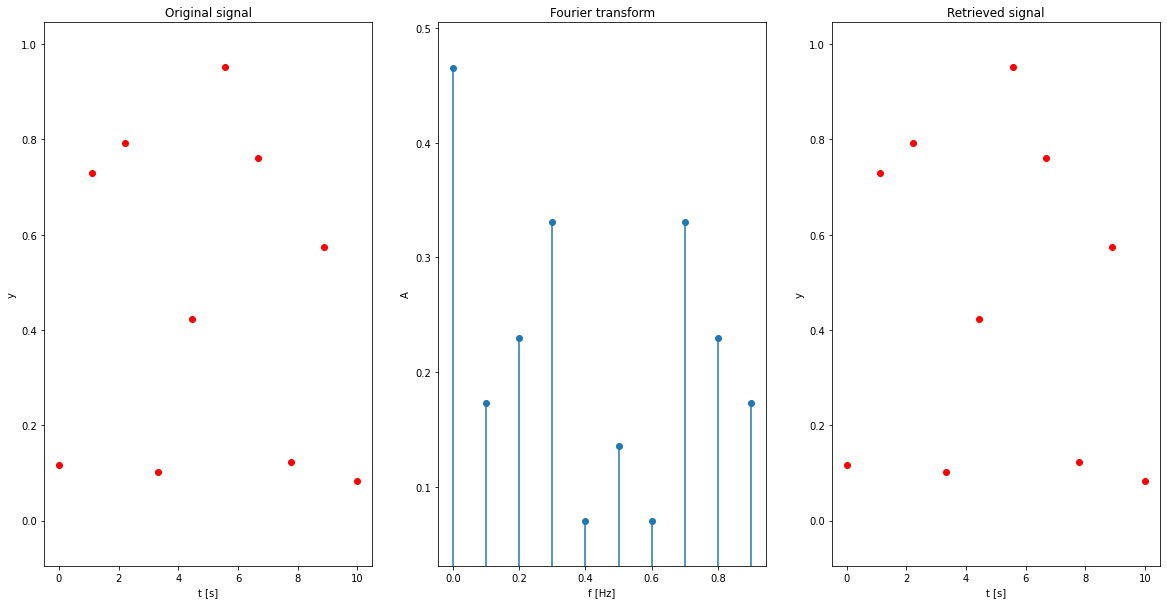

In [144]:
timepoints = np.linspace(0, 10, 10)
x = np.random.random(10)

signal = DiscreteSignal(timepoints, x, 1)
fourier = fft(signal)
inverse_fourier = DiscreteSignal(timepoints, np.fft.ifft(fourier.arguments), 11)

# fourier = np.fft.fft(x)
# inverse_fourier = np.fft.ifft(fourier)

fig = figure(1, figsize = (20, 10))

ax_0 = fig.add_subplot(131)
ax_1 = fig.add_subplot(132)
ax_2 = fig.add_subplot(133)

ax_0.set_title("Original signal")
ax_1.set_title("Fourier transform")
ax_2.set_title("Retrieved signal")

base = DiscreteSignal([0], [0], 1)

draw_signal(ax_0, base, signal)
draw_fft(ax_1, fourier)
draw_signal(ax_2, base, inverse_fourier)